In [5]:
import datetime
import json
import os
import pickle
import time

import h5py
import matplotlib.pyplot as plt
import numpy as np
import xobjects as xo
import xpart as xp
import xtrack as xt
from tqdm import tqdm

In [6]:
import normed_dynamic_indicators as ndi

In [7]:
maskpath = "/home/HPC/camontan/lhc_dynamic_indicators/masks"
worst_mask = "mask_b1_without_bb_33.json"
best_mask = "mask_b1_without_bb_21.json"

In [28]:
context = xo.ContextCupy()      # For CUDA GPUs

with open(os.path.join(maskpath, worst_mask), "r") as f:
    mask = json.load(f)

tracker = xt.Tracker(_context=context, line=xt.Line.from_dict(mask))
tracker.particle_ref = xp.Particles(mass0=xp.PROTON_MASS_EV, q0=1, p0c=7e12)
twiss = tracker.twiss()

Done loading line from dict.           


In [29]:
line=xt.Line.from_dict(mask)

Done loading line from dict.           


In [46]:
line=xt.Line.from_dict(mask)

print(len(line.element_names))

line.merge_consecutive_drifts(inplace=True)

print(len(line.element_names))

line.merge_consecutive_multipoles(inplace=True)

print(len(line.element_names))


for i in line.element_names:
    print(i)

Done loading line from dict.           
23798
17945


NotImplementedError: `merge_consecutive_multipoles` not available when deferred expressions are used

In [51]:
for l in line.elements:
    print(l.__class__.__name__)

Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Multipole
Drift
Mu

In [23]:
max_turns = int(2e3)
n_samples = 10

particles = tracker.build_particles(
    zeta_norm=np.linspace(0, 0.0130, n_samples),
    nemitt_x=2.5e-6, nemitt_y=2.5e-6, _context=context
)

tracker.track(particles, num_turns=max_turns, turn_by_turn_monitor=True)


0.013333333333333332

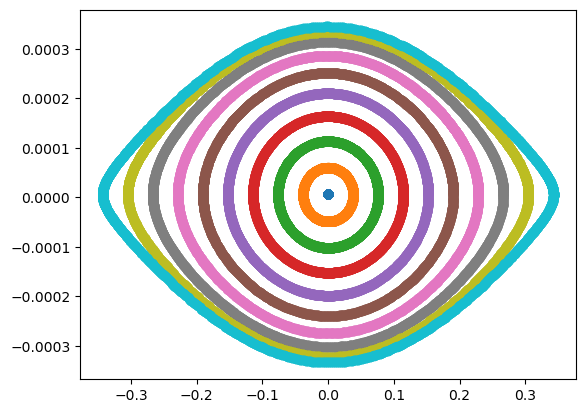

In [24]:
for i in range(n_samples):
    plt.scatter(tracker.record_last_track.zeta[i], tracker.record_last_track.pzeta[i])

np.linspace(0, 0.02, n_samples)[6]

In [25]:
context = xo.ContextCupy()      # For CUDA GPUs

with open(os.path.join(maskpath, best_mask), "r") as f:
    mask = json.load(f)

tracker = xt.Tracker(_context=context, line=xt.Line.from_dict(mask))
tracker.particle_ref = xp.Particles(mass0=xp.PROTON_MASS_EV, q0=1, p0c=7e12)
twiss = tracker.twiss()

Done loading line from dict.           


In [26]:
max_turns = int(2e3)
n_samples = 10

particles = tracker.build_particles(
    zeta_norm=np.linspace(0, 0.0130, n_samples),
    nemitt_x=2.5e-6, nemitt_y=2.5e-6, _context=context
)

tracker.track(particles, num_turns=max_turns, turn_by_turn_monitor=True)


0.013333333333333332

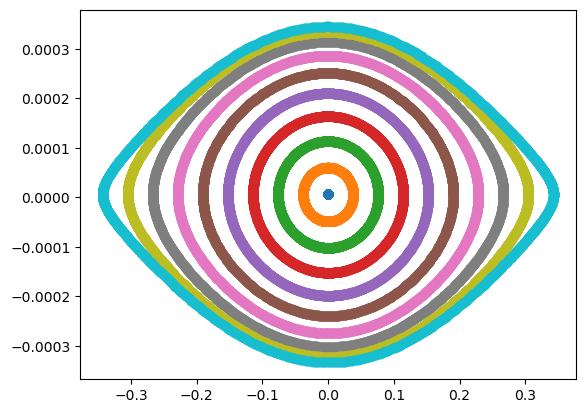

In [27]:
for i in range(n_samples):
    plt.scatter(tracker.record_last_track.zeta[i], tracker.record_last_track.pzeta[i])

np.linspace(0, 0.02, n_samples)[6]

In [65]:
max_sigma = 20.0
max_turns = int(1e3)
n_samples = 100

x = np.linspace(0, 14.5, n_samples)
y = np.linspace(0, 15.5, n_samples)
x, y = np.meshgrid(x, y)
x = x.flatten()
y = y.flatten()

particles = tracker.build_particles(
    zeta_norm=0.0, pzeta_norm=0.0,
    x_norm = x,
    y_norm = y,
    nemitt_x=2.5e-6, nemitt_y=2.5e-6, _context=context
)

In [66]:
tracker.track(particles, num_turns=max_turns)
particles.at_turn

array([1000, 1000, 1000, ...,    5,    5,    5])

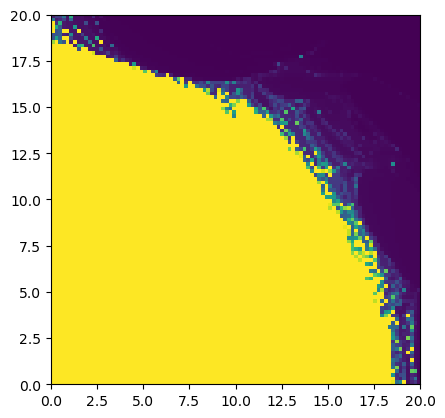

In [67]:
plt.imshow(particles.at_turn.get().reshape(n_samples, n_samples), origin="lower", extent=[0, max_sigma, 0, max_sigma])

In [113]:
max_sigma = 20.0
max_turns = int(1e3)
n_samples = 10

particles = tracker.build_particles(
    zeta=np.linspace(0, 0.2, n_samples),
    nemitt_x=2.5e-6, nemitt_y=2.5e-6, _context=context
)

In [114]:
twiss.get_normalized_coordinates(particles)

{'particle_id': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'at_element': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'x_norm': array([-1.10094184e-07, -2.11988748e-07, -3.13883313e-07, -4.15777878e-07,
        -5.17672442e-07, -6.19567007e-07, -7.21461571e-07, -8.23356136e-07,
        -9.25250701e-07, -1.02714527e-06]),
 'px_norm': array([ 6.71887848e-08, -7.71892008e-08, -2.21567186e-07, -3.65945172e-07,
        -5.10323157e-07, -6.54701143e-07, -7.99079128e-07, -9.43457114e-07,
        -1.08783510e-06, -1.23221309e-06]),
 'y_norm': array([1.19428044e-08, 1.50030727e-07, 2.88118649e-07, 4.26206571e-07,
        5.64294493e-07, 7.02382416e-07, 8.40470338e-07, 9.78558260e-07,
        1.11664618e-06, 1.25473410e-06]),
 'py_norm': array([-2.15814017e-08, -1.13362215e-07, -2.05143029e-07, -2.96923842e-07,
        -3.88704655e-07, -4.80485469e-07, -5.72266282e-07, -6.64047096e-07,
        -7.55827909e-07, -8.47608723e-07]),
 'zeta_norm': array([-2.25408451e-07,  8.42228397e-04,  1.68468220e-03,  2.

In [111]:
tracker.track(particles, num_turns=max_turns, turn_by_turn_monitor=True)

IndexError: index 10 is out of bounds for axis 0 with size 10

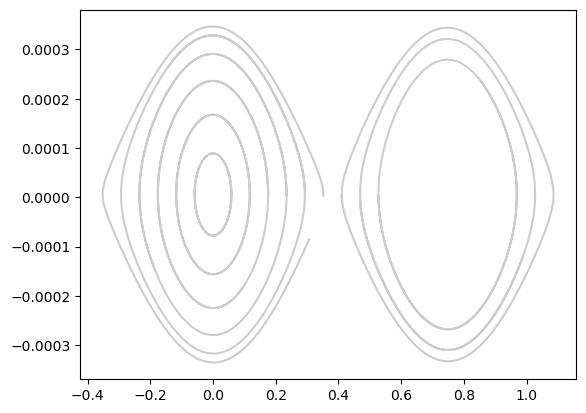

In [112]:
for i in range(100):
    plt.plot(tracker.record_last_track.zeta[i], tracker.record_last_track.pzeta[i], color="black", alpha=0.2)

In [38]:
context = xo.ContextCupy()      # For CUDA GPUs

with open(os.path.join(maskpath, best_mask), "r") as f:
    mask = json.load(f)

tracker = xt.Tracker(_context=context, line=xt.Line.from_dict(mask))
tracker.particle_ref = xp.Particles(mass0=xp.PROTON_MASS_EV, q0=1, p0c=7e12)
twiss = tracker.twiss()

Done loading line from dict.           


In [48]:
np.linalg.inv(twiss.W_matrix[0])

array([[ 9.21209512e-02, -4.57977016e-08, -1.88708517e-03,
         1.35437071e-01, -4.12288181e-06,  2.28472574e-02],
       [ 2.05635599e-01,  1.08550813e+01, -1.03339196e-03,
         6.34825494e-02, -6.55103831e-06,  1.78786564e-01],
       [ 1.48435681e-03,  9.91944900e-02,  6.74732714e-02,
        -1.29043382e-07,  6.08259039e-06, -1.65276231e-03],
       [ 3.75828369e-04,  3.86868467e-02, -1.80177720e-01,
         1.48203859e+01, -3.90685703e-06, -5.45849825e-03],
       [-4.41174556e-04,  9.49172650e-03,  3.71396509e-05,
        -1.79233039e-03,  3.79085815e-02,  2.03872142e-06],
       [ 3.96778207e-06,  1.20919669e-03,  2.23517684e-05,
        -2.40310701e-03,  1.89088157e-04,  2.63792677e+01]])

In [55]:
max_sigma = 20.0
max_turns = int(1e3)
n_samples = 100

x = np.linspace(0, 15, n_samples)
y = np.linspace(0, 18.5, n_samples)
x, y = np.meshgrid(x, y)
x = x.flatten()
y = y.flatten()

particles = tracker.build_particles(
    zeta_norm=0.0, pzeta_norm=0.0,
    x_norm = x,
    y_norm = y,
    nemitt_x=2.5e-6, nemitt_y=2.5e-6, _context=context
)

In [56]:
tracker.track(particles, num_turns=max_turns)
particles.at_turn

array([1000, 1000, 1000, ...,    8,    7,   11])

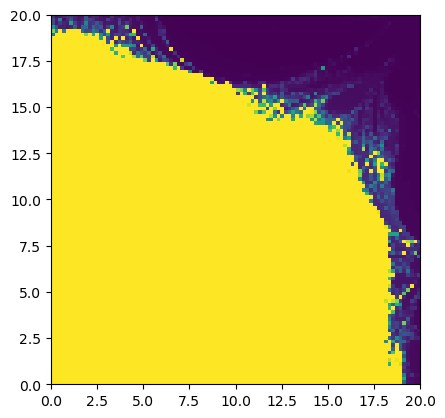

In [57]:
plt.imshow(particles.at_turn.get().reshape(n_samples, n_samples), origin="lower", extent=[0, max_sigma, 0, max_sigma])

In [42]:
max_sigma = 20.0
max_turns = int(1e3)
n_samples = 100

x = np.linspace(0, max_sigma, n_samples)
y = np.linspace(0, max_sigma, n_samples)
x, y = np.meshgrid(x, y)
x = x.flatten()
y = y.flatten()

particles = tracker.build_particles(
    zeta_norm=0.0, pzeta_norm=0.0,
    x_norm = x,
    y_norm = y,
    nemitt_x=2.5e-6, nemitt_y=2.5e-6, _context=context
)

In [43]:
tracker.track(particles, num_turns=max_turns)
particles.at_turn

array([1000, 1000, 1000, ...,    1,    1,    1])

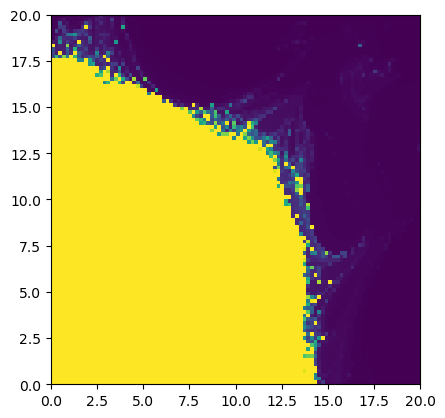

In [44]:
plt.imshow(particles.at_turn.get().reshape(n_samples, n_samples), origin="lower", extent=[0, max_sigma, 0, max_sigma])

In [35]:
max_m = 1.5e-3
max_turns = int(1e3)
n_samples = 100

x = np.linspace(0, max_m, n_samples)
y = np.linspace(0, max_m, n_samples)
x, y = np.meshgrid(x, y)
x = x.flatten()
y = y.flatten()

particles = xp.Particles(
    p0c=7e12, mass0=xp.PROTON_MASS_EV, q0=1,
    x=x, px=0*x, y=y, py=0*y, zeta=0*x, pzeta=0*x,
    _context=context
)

In [36]:
tracker.track(particles, num_turns=max_turns)
particles.at_turn

array([1000, 1000, 1000, ...,    0,    0,    0])

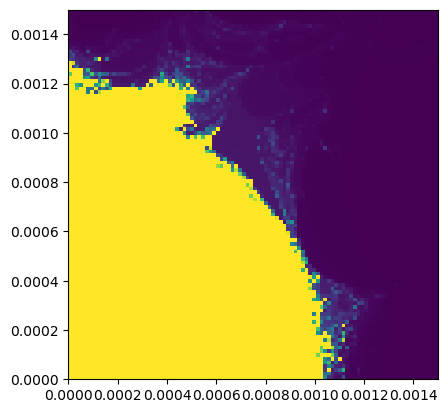

In [37]:
plt.imshow(particles.at_turn.get().reshape(n_samples, n_samples), origin="lower", extent=[0, max_m, 0, max_m])

In [14]:
particles.at_turn

array([1000, 1000, 1000, ...,  118,  414,  109])

In [27]:
particles = tracker.build_particles(
    zeta_norm=0.0, pzeta_norm=0.0,
    x_norm = x,
    px_norm = 0.0,
    y_norm = y,
    py_norm = 0.0,
    nemitt_x=2.5e-6, nemitt_y=2.5e-6, _context=context
)

print(particles.x)
print(particles.y)
print(particles.px)
print(particles.py)

[-2.02594916e-07  4.08432044e-05  8.18890036e-05 ...  3.95892381e-03
  3.99996961e-03  4.04101541e-03]
[ 6.45129392e-08 -2.09245665e-07 -4.83004268e-07 ...  5.39295656e-03
  5.39268280e-03  5.39240904e-03]
[-9.65900347e-08 -8.78221180e-07 -1.65985233e-06 ... -7.55851402e-05
 -7.63667714e-05 -7.71484025e-05]
[ 4.42997898e-09  3.35425230e-10 -3.75912852e-09 ...  6.63712325e-05
  6.63671380e-05  6.63630434e-05]


In [29]:
particles = tracker.build_particles(
    zeta_norm=0.0, pzeta_norm=0.0,
    x_norm = x,
    y_norm = y,
    nemitt_x=2.5e-6, nemitt_y=2.5e-6, _context=context
)

print(particles.x)
print(particles.y)
print(particles.px)
print(particles.py)

[-2.02594916e-07  4.08432044e-05  8.18890036e-05 ...  3.95892381e-03
  3.99996961e-03  4.04101541e-03]
[ 6.45129392e-08 -2.09245665e-07 -4.83004268e-07 ...  5.39295656e-03
  5.39268280e-03  5.39240904e-03]
[-9.65900347e-08 -8.78221180e-07 -1.65985233e-06 ... -7.55851402e-05
 -7.63667714e-05 -7.71484025e-05]
[ 4.42997898e-09  3.35425230e-10 -3.75912852e-09 ...  6.63712325e-05
  6.63671380e-05  6.63630434e-05]


In [24]:
import scipy.constants as const

def x_m_to_sigma(x_m):
    proton_mass = const.m_p # kg

    # energy at 7 TeV
    proton_energy = 7000e9 # eV
    # tev to joule
    proton_energy *= const.e # J

    # get gamma
    proton_gamma = proton_energy/proton_mass/const.c**2

    # get beta
    proton_beta = np.sqrt(1 - 1/proton_gamma**2)

    beta_x = 117.83 # m
    beta_y = 219.64 # m
    beta_gamma = proton_beta * proton_gamma
    nom_emittance = 2.5e-6 # m

    phys_emittance = nom_emittance / (beta_gamma)

    return x_m / (np.sqrt(beta_x * phys_emittance))

def y_m_to_sigma(y_m):
    proton_mass = const.m_p # kg

    # energy at 7 TeV
    proton_energy = 7000e9 # eV
    # tev to joule
    proton_energy *= const.e # J

    # get gamma
    proton_gamma = proton_energy/proton_mass/const.c**2

    # get beta
    proton_beta = np.sqrt(1 - 1/proton_gamma**2)

    beta_x = 117.83 # m
    beta_y = 219.64 # m
    beta_gamma = proton_beta * proton_gamma
    nom_emittance = 2.5e-6 # m

    phys_emittance = nom_emittance / (beta_gamma)

    return y_m / (np.sqrt(beta_y * phys_emittance))

In [25]:
y_m_to_sigma(5.39240904e-03)

19.876582963639677

In [45]:
x_m_to_sigma(1.5e-03)

7.548800281501602